In [1]:
# multivariate output multi-step 1d cnn example
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from keras.layers import Dropout
import numpy as np

Using TensorFlow backend.


In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [84]:
dataset = pd.read_csv('borhci.csv', header=0, index_col=0)
#dataset=dataset.del((:,0))
dataset = dataset.drop((c for c in dataset.columns[-6:]), axis=1)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# choose a number of time steps
n_steps_in, n_steps_out = 12, 3
# convert into input/output
X_train, y_train = split_sequences(scaled[:-12,:], n_steps_in, n_steps_out)
# flatten output
n_output = y_train.shape[1] * y_train.shape[2]
y_train = y_train.reshape((y_train.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X_train.shape[2]
test = scaled[-39:,:]
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)
#X_test=scaled[-15:-3,:]
#y_test=scaled[-3:,:]
#X_test = X_test.reshape((1, n_steps_in, n_features))
#y_test = y_test.reshape((1, n_steps_out, n_features))
y_test = y_test.reshape((y_test.shape[0], n_output))

Train on 254 samples, validate on 25 samples
Epoch 1/500
 - 1s - loss: 0.3727 - val_loss: 0.2863
Epoch 2/500
 - 0s - loss: 0.3200 - val_loss: 0.2694
Epoch 3/500
 - 0s - loss: 0.3119 - val_loss: 0.2674
Epoch 4/500
 - 0s - loss: 0.3042 - val_loss: 0.2668
Epoch 5/500
 - 0s - loss: 0.2919 - val_loss: 0.2673
Epoch 6/500
 - 0s - loss: 0.2873 - val_loss: 0.2674
Epoch 7/500
 - 0s - loss: 0.2856 - val_loss: 0.2653
Epoch 8/500
 - 0s - loss: 0.2806 - val_loss: 0.2610
Epoch 9/500
 - 0s - loss: 0.2778 - val_loss: 0.2635
Epoch 10/500
 - 0s - loss: 0.2754 - val_loss: 0.2595
Epoch 11/500
 - 0s - loss: 0.2721 - val_loss: 0.2569
Epoch 12/500
 - 0s - loss: 0.2680 - val_loss: 0.2640
Epoch 13/500
 - 0s - loss: 0.2648 - val_loss: 0.2598
Epoch 14/500
 - 0s - loss: 0.2657 - val_loss: 0.2573
Epoch 15/500
 - 0s - loss: 0.2640 - val_loss: 0.2536
Epoch 16/500
 - 0s - loss: 0.2658 - val_loss: 0.2595
Epoch 17/500
 - 0s - loss: 0.2622 - val_loss: 0.2564
Epoch 18/500
 - 0s - loss: 0.2612 - val_loss: 0.2535
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.1680 - val_loss: 0.2023
Epoch 155/500
 - 0s - loss: 0.1704 - val_loss: 0.2022
Epoch 156/500
 - 0s - loss: 0.1665 - val_loss: 0.2024
Epoch 157/500
 - 0s - loss: 0.1702 - val_loss: 0.2032
Epoch 158/500
 - 0s - loss: 0.1666 - val_loss: 0.2042
Epoch 159/500
 - 0s - loss: 0.1679 - val_loss: 0.2126
Epoch 160/500
 - 0s - loss: 0.1680 - val_loss: 0.1999
Epoch 161/500
 - 0s - loss: 0.1733 - val_loss: 0.2097
Epoch 162/500
 - 0s - loss: 0.1665 - val_loss: 0.2059
Epoch 163/500
 - 0s - loss: 0.1668 - val_loss: 0.1996
Epoch 164/500
 - 0s - loss: 0.1660 - val_loss: 0.1999
Epoch 165/500
 - 0s - loss: 0.1677 - val_loss: 0.1987
Epoch 166/500
 - 0s - loss: 0.1679 - val_loss: 0.1996
Epoch 167/500
 - 0s - loss: 0.1632 - val_loss: 0.2003
Epoch 168/500
 - 0s - loss: 0.1722 - val_loss: 0.1995
Epoch 169/500
 - 0s - loss: 0.1658 - val_loss: 0.2000
Epoch 170/500
 - 0s - loss: 0.1667 - val_loss: 0.1998
Epoch 171/500
 - 0s - loss: 0.1676 - val_loss: 0.2020
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1574 - val_loss: 0.1950
Epoch 307/500
 - 0s - loss: 0.1636 - val_loss: 0.1928
Epoch 308/500
 - 0s - loss: 0.1599 - val_loss: 0.1924
Epoch 309/500
 - 0s - loss: 0.1618 - val_loss: 0.1931
Epoch 310/500
 - 0s - loss: 0.1618 - val_loss: 0.1936
Epoch 311/500
 - 0s - loss: 0.1582 - val_loss: 0.1923
Epoch 312/500
 - 0s - loss: 0.1600 - val_loss: 0.2054
Epoch 313/500
 - 0s - loss: 0.1588 - val_loss: 0.2082
Epoch 314/500
 - 0s - loss: 0.1620 - val_loss: 0.1986
Epoch 315/500
 - 0s - loss: 0.1620 - val_loss: 0.1922
Epoch 316/500
 - 0s - loss: 0.1591 - val_loss: 0.1928
Epoch 317/500
 - 0s - loss: 0.1630 - val_loss: 0.1941
Epoch 318/500
 - 0s - loss: 0.1597 - val_loss: 0.1949
Epoch 319/500
 - 0s - loss: 0.1593 - val_loss: 0.2010
Epoch 320/500
 - 0s - loss: 0.1624 - val_loss: 0.1907
Epoch 321/500
 - 0s - loss: 0.1596 - val_loss: 0.1979
Epoch 322/500
 - 0s - loss: 0.1600 - val_loss: 0.1940
Epoch 323/500
 - 0s - loss: 0.1601 - val_loss: 0.2010
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1574 - val_loss: 0.1897
Epoch 459/500
 - 0s - loss: 0.1579 - val_loss: 0.2111
Epoch 460/500
 - 0s - loss: 0.1576 - val_loss: 0.1916
Epoch 461/500
 - 0s - loss: 0.1559 - val_loss: 0.1965
Epoch 462/500
 - 0s - loss: 0.1555 - val_loss: 0.1904
Epoch 463/500
 - 0s - loss: 0.1563 - val_loss: 0.1904
Epoch 464/500
 - 0s - loss: 0.1553 - val_loss: 0.1942
Epoch 465/500
 - 0s - loss: 0.1557 - val_loss: 0.1939
Epoch 466/500
 - 0s - loss: 0.1578 - val_loss: 0.1910
Epoch 467/500
 - 0s - loss: 0.1566 - val_loss: 0.1963
Epoch 468/500
 - 0s - loss: 0.1560 - val_loss: 0.2007
Epoch 469/500
 - 0s - loss: 0.1569 - val_loss: 0.1919
Epoch 470/500
 - 0s - loss: 0.1617 - val_loss: 0.2099
Epoch 471/500
 - 0s - loss: 0.1552 - val_loss: 0.1904
Epoch 472/500
 - 0s - loss: 0.1573 - val_loss: 0.1942
Epoch 473/500
 - 0s - loss: 0.1569 - val_loss: 0.1923
Epoch 474/500
 - 0s - loss: 0.1591 - val_loss: 0.2001
Epoch 475/500
 - 0s - loss: 0.1558 - val_loss: 0.1911
Epoch 476/500
 - 0s - loss: 

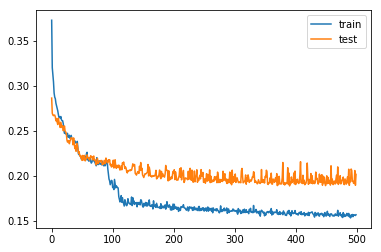

In [85]:
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=10,activation='relu',input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(100,activation='relu',input_shape=(n_steps_in, n_features)))
model.add(Dense(140,activation='relu'))
model.add(Dense(n_output,activation='relu'))
model.compile(optimizer='adadelta', loss='mae')
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test, y_test),verbose=2,shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [86]:
#X_test = X_test.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test)
n_yhat = yhat.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_yhat = scaler.inverse_transform(n_yhat)
inv_yhat = inv_yhat[:,4:7]
y_test = y_test.reshape((y_test.shape[0]* n_steps_out,n_features))
inv_y = scaler.inverse_transform(y_test)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 676.866


In [87]:
i=0
ninhat=[]
x_input = scaled[-12:,:]
x_input = x_input.reshape((1, n_steps_in, n_features))
nx_input = x_input
while i < 8:
    nyhat = model.predict(nx_input, verbose=0)
    #print(nyhat)
    nx_input = nx_input.reshape((n_steps_in, n_features))
    nyhat = nyhat.reshape((n_steps_out, n_features))
    nx_input = np.append(nx_input[3:,:],nyhat)
    nx_input = nx_input.reshape((1, n_steps_in, n_features))
    ninhat = np.append(ninhat,nyhat)
    i = i+1

In [88]:
print(nx_input.shape)
print(nyhat.shape)
print(ninhat.shape)

(1, 12, 8)
(3, 8)
(192,)


In [89]:
ninhat = ninhat.reshape((24, n_features))
ninhat = scaler.inverse_transform(ninhat)
print(ninhat.shape)

(24, 8)


In [90]:
print(ninhat[:,4:7])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.49444677e+01 1.36658106e-02 4.34720569e+01]
 [6.65166929e+01 0.00000000e+00 1.77096632e+01]
 [0.00000000e+00 0.00000000e+00 1.79184963e+02]
 [1.81508880e+02 1.26753718e-01 8.28697503e+02]
 [2.31151224e+02 1.09792599e-01 0.00000000e+00]
 [1.91299540e+02 1.29293728e-01 1.06280566e+03]
 [2.87489894e+02 2.06147368e-01 1.46447932e+03]
 [3.69210163e+02 2.23435693e-01 0.00000000e+00]
 [3.79838423e+02 2.34731484e-01 1.63529257e+03]
 [3.49053149e+02 2.55796067e-01 1.44380988e+03]
 [4.61150853e+02 2.78700044e-01 0.00000000e+00]
 [4.90993394e+02 2.90259682e-01 1.492430

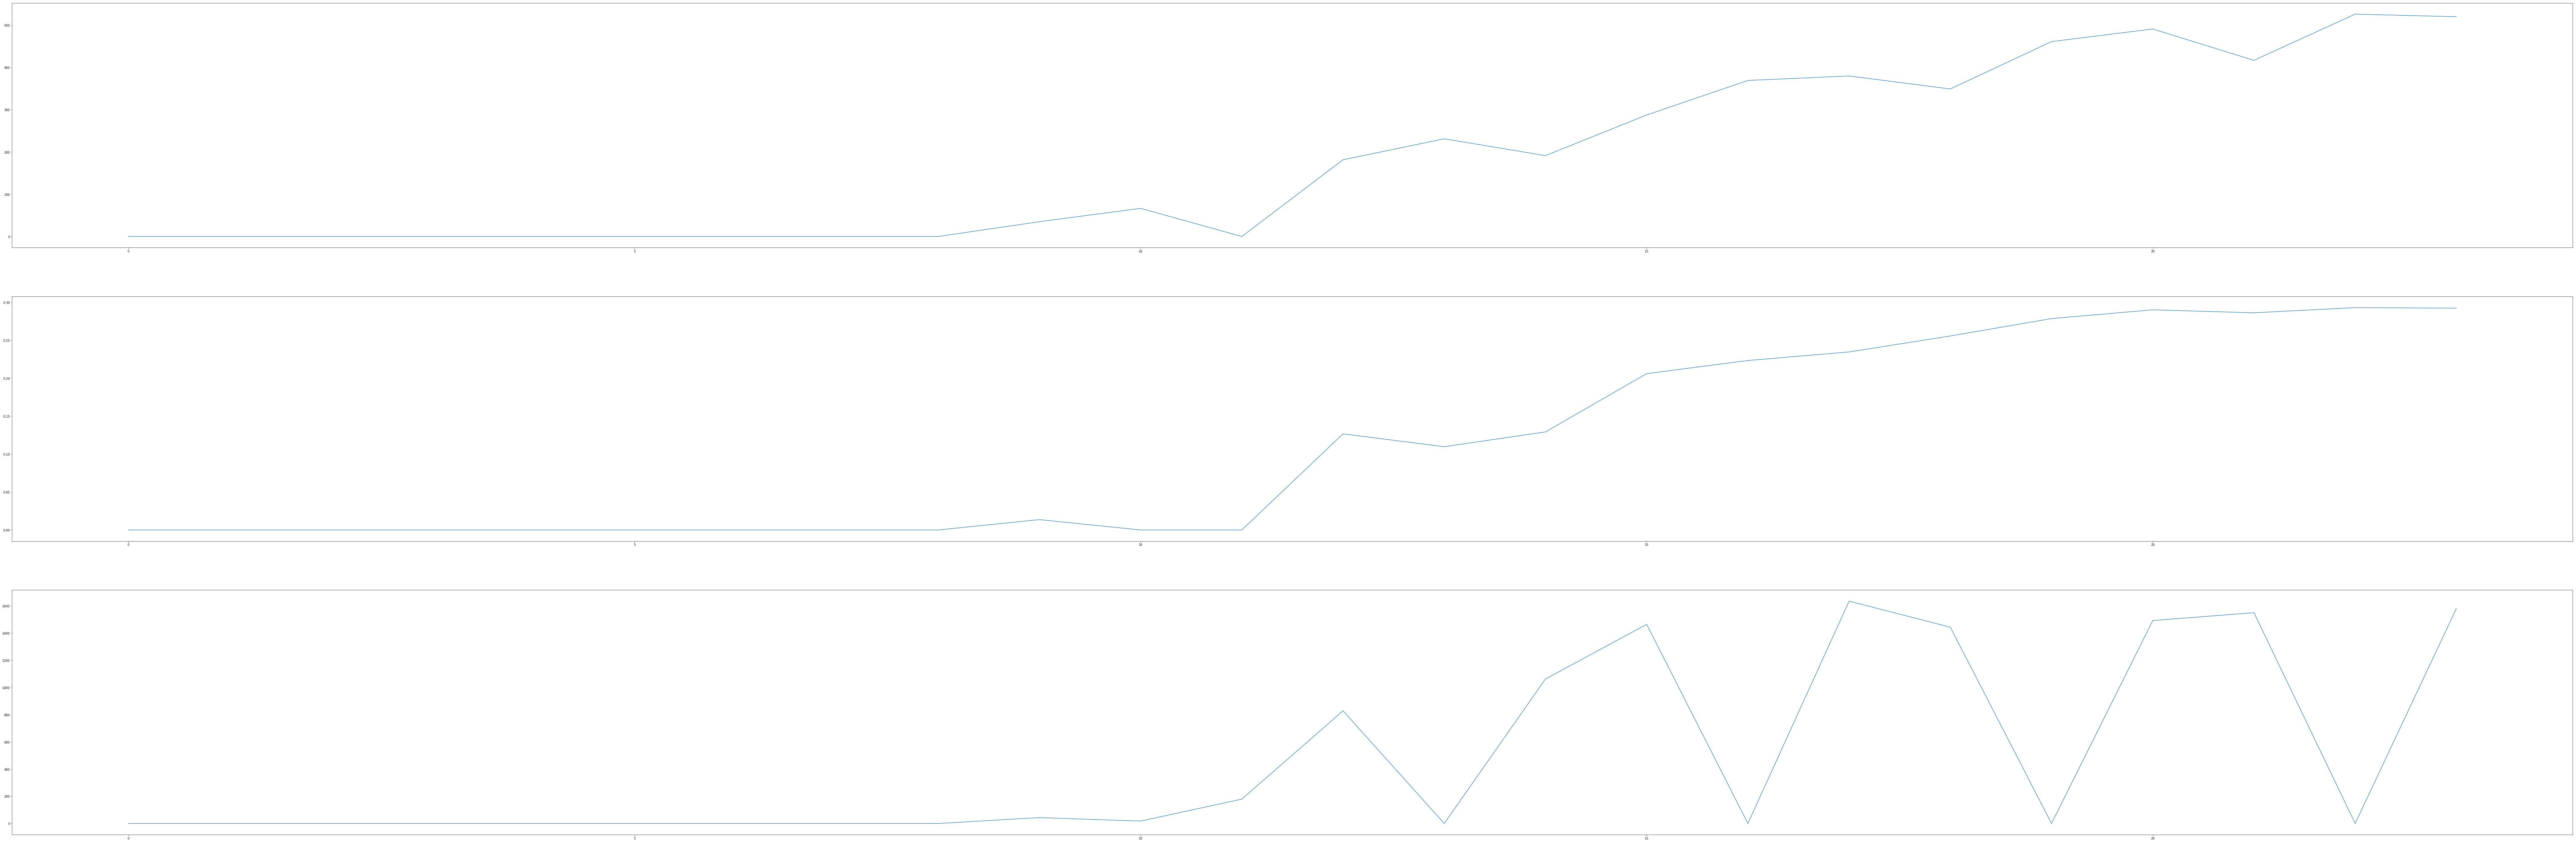

In [91]:
groups = [4,5,6]
i = 1
# plot each column
plt.figure(figsize=(150,50))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(ninhat[:,group])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()


In [92]:
new = dataset

In [12]:
new.shape

(280, 8)

In [13]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [14]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
       '01/03/2014', '01/04/2014', '01/05/2014', '01/06/2014', '01/07/2014',
       '01/08/2014', '01/09/2014', '01/10/2014', '01/11/2014', '01/12/2014'],
      dtype='object', name='Date', length=280)

In [15]:
nin=new.index[-1]
print(nin)

01/12/2014


In [16]:
newxhat= pd.DataFrame(ninhat,columns=[c for c in new.columns] )

In [17]:
newxhat.shape

(24, 8)

In [18]:
new=new.append(newxhat)
new.shape

(304, 8)

In [19]:
new.tail()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
19,231.694990,55.520509,0.0,0.0,0.0,0.0,0.0,0.0
20,233.518382,55.595192,0.0,0.0,0.0,0.0,0.0,0.0
21,219.413075,55.532201,0.0,0.0,0.0,0.0,0.0,0.0
22,231.527653,55.489449,0.0,0.0,0.0,0.0,0.0,0.0
23,233.352260,55.566989,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
newbori = new.to_csv('newbori2.csv')